- Cell type enrichment analysis using Cochran-Mantel-Hasenszel statistics (CMH statistics)

In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import anndata
import pandas as pd

### 1. Prepare data

- Load the data for the anterior and posterior MERFISH sections

In [ ]:
%%time

# load 1311 posterior 
Donor_1311_posterior_adata  = anndata.read_h5ad(r'./processed_data/mapmycell_annotated_adata/MER2_Gpe_Gpi_CaPu_1311__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./processed_data/AP34a_MERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_1311_posterior_adata.obs = Donor_1311_posterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_Globus_pallidus_subclustered']])
Donor_1311_posterior_adata.obs = Donor_1311_posterior_adata.obs.rename(columns = {'spatialmodule_Globus_pallidus_subclustered':'Final_spatialModules'})

print('load 1311 posterior .....')


# # load 2427 posterior 
Donor_2427_posterior_adata = anndata.read_h5ad(r'./processed_data/mapmycell_annotated_adata/MER4_Gpe_Gpi_2724__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./processed_data/AP26a_MERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_2427_posterior_adata.obs = Donor_2427_posterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_finer_resolution']])
Donor_2427_posterior_adata.obs = Donor_2427_posterior_adata.obs.rename(columns = {'spatialmodule_finer_resolution':'Final_spatialModules'})
print('load 2427 posterior .....')


# # load 2427 anterior 
Donor_2427_anterior_adata = anndata.read_h5ad(r'./processed_data/mapmycell_annotated_adata/MER1_CaPuNAC_2427__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'./processed_data/AP19a_MERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_2427_anterior_adata.obs = Donor_2427_anterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_STRd_subclustered']])
Donor_2427_anterior_adata.obs = Donor_2427_anterior_adata.obs.rename(columns = {'spatialmodule_STRd_subclustered':'Final_spatialModules'})
print('load 2427 anterior .....')


# # load 3924 anterior 
Donor_3924_anterior_adata = anndata.read_h5ad(r'./processed_data/mapmycell_annotated_adata/MER5_CaPuNAc_3924__MERFISH_annotated.h5ad')
spatialModuleAnnotation = pd.read_csv(r'/processed_data/AP18a_MERFISH/GroupLevelspatialModule_MatrixStriosome_included_cleaned.csv', index_col=0)
Donor_3924_anterior_adata.obs = Donor_3924_anterior_adata.obs.join(spatialModuleAnnotation[['GrayMatter_MatrixStriosome_clustered','spatialmodule_STRd_subclustered']])
Donor_3924_anterior_adata.obs = Donor_3924_anterior_adata.obs.rename(columns = {'spatialmodule_STRd_subclustered':'Final_spatialModules'})
print('load 3924 anterior  .....')

load 1311 posterior .....
load 2427 posterior .....
load 2427 anterior .....
load 3924 anterior  .....
CPU times: user 1min 25s, sys: 16.6 s, total: 1min 41s
Wall time: 1min 43s


- Concatenate the anndata

- Make sure the same order of genes is used in all samples and replace count with raw counts

In [3]:
# make sure the same order of genes is used in all samples  and replace count with raw counts
common_gns = np.array(Donor_2427_posterior_adata.var_names)
Donor_1311_posterior_adata.X = Donor_1311_posterior_adata.layers['X_raw']
Donor_1311_posterior_adata = Donor_1311_posterior_adata[:,common_gns].copy()
Donor_1311_posterior_adata.obsm['X_spatial'] = Donor_1311_posterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_1311_posterior_adata.obsm else Donor_1311_posterior_adata.obsm['X_spatial']

Donor_2427_posterior_adata.X = Donor_2427_posterior_adata.layers['X_raw']
Donor_2427_posterior_adata = Donor_2427_posterior_adata[:,common_gns].copy()
Donor_2427_posterior_adata.obsm['X_spatial'] = Donor_2427_posterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_2427_posterior_adata.obsm else Donor_2427_posterior_adata.obsm['X_spatial']

Donor_2427_anterior_adata.X = Donor_2427_anterior_adata.obsm['X_raw']
Donor_2427_anterior_adata = Donor_2427_anterior_adata[:,common_gns].copy()
Donor_2427_anterior_adata.obsm['X_spatial'] = Donor_2427_anterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_2427_anterior_adata.obsm else Donor_2427_anterior_adata.obsm['X_spatial']

Donor_3924_anterior_adata.X = Donor_3924_anterior_adata.layers['X_raw']
Donor_3924_anterior_adata = Donor_3924_anterior_adata[:,common_gns].copy()
Donor_3924_anterior_adata.obsm['X_spatial'] = Donor_3924_anterior_adata.obsm['X_spatial_rotated'] if 'X_spatial_rotated'  in Donor_3924_anterior_adata.obsm else Donor_3924_anterior_adata.obsm['X_spatial']

In [4]:
# concatenate the data
adata = anndata.concat([Donor_1311_posterior_adata,Donor_2427_posterior_adata,Donor_2427_anterior_adata,Donor_3924_anterior_adata],
                       label = 'samples',
                        keys= ['Donor_1311_posterior','Donor_2427_posterior','Donor_2427_anterior','Donor_3924_anterior'],
                        fill_value=0,
                        join='outer',
                        merge='same' ,
                        index_unique='_' # make the cell index unique
                        ) 

In [5]:
adata

AnnData object with n_obs × n_vars = 3250780 × 673
    obs: 'volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'Neighborhood_label', 'Neighborhood_name', 'Neighborhood_bootstrapping_probability', 'Class_label', 'Class_name', 'Class_bootstrapping_probability', 'Subclass_label', 'Subclass_name', 'Subclass_bootstrapping_probability', 'Group_label', 'Group_name', 'Group_bootstrapping_probability', 'Cluster_label', 'Cluster_name', 'Cluster_alias', 'Cluster_bootstrapping_probability', 'GrayMatter_MatrixStriosome_clustered', 'Final_spatialModules', 'samples'
    obsm: 'X_raw', 'X_spatial', 'X_spatial_rotated', 'X_umap', 'X_pca'
    layers: 'X_raw'

- Visualize the concatenated data

In [6]:
np.unique(adata.obs['GrayMatter_MatrixStriosome_clustered'])

array(['Ependymal_zone', 'Matrix', 'STRv', 'Striosome', 'white_matter'],
      dtype=object)

In [7]:
adata.obs.columns

Index(['volm', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'leiden', 'Neighborhood_label',
       'Neighborhood_name', 'Neighborhood_bootstrapping_probability',
       'Class_label', 'Class_name', 'Class_bootstrapping_probability',
       'Subclass_label', 'Subclass_name', 'Subclass_bootstrapping_probability',
       'Group_label', 'Group_name', 'Group_bootstrapping_probability',
       'Cluster_label', 'Cluster_name', 'Cluster_alias',
       'Cluster_bootstrapping_probability',
       'GrayMatter_MatrixStriosome_clustered', 'Final_spatialModules',
       'samples'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs = plt.subplots(2,2 ,dpi = 300, figsize = (15,6))
for i,sampleID in enumerate(np.unique(adata.obs['samples'])):
    ax = axs.flatten()[i]
    keep = adata.obs['samples'] == sampleID
    sns.scatterplot(x = adata[keep].obsm['X_spatial'][:,0],y = adata[keep].obsm['X_spatial'][:,1], s = 1, c = 'gray', ax = ax)
    keep_PuStrio  = adata[keep].obs['Final_Major_region_label'] == 'Caudate'
    sns.scatterplot(x = adata[keep].obsm['X_spatial'][keep_PuStrio,0],y = adata[keep].obsm['X_spatial'][keep_PuStrio,1], s = 1, c = 'red', ax = ax)
    
    keep_CauStrio  = adata[keep].obs['Final_Major_region_label'] == 'Putamen'
    sns.scatterplot(x = adata[keep].obsm['X_spatial'][keep_CauStrio,0],y = adata[keep].obsm['X_spatial'][keep_CauStrio,1], s = 1, c = 'blue', ax = ax)
    ax.invert_yaxis()

plt.show()

- Define helper functions

a. Plotting function

In [9]:
def plot_cluster_scdata(scdata,cmap,all_clusters,clusters=[1,2],bg_color = 'gray',bg_pt_size = 5, point_sz = 25, transpose=1,flipx=1,flipy=1,hue_input = 'leiden' , ax = None,use_seaborn = False,show_title = True):
    """
    plot spatial location of cell cluster using either seaborn or matplotlib
    use seaborn for individual clusters
    use matplotlib scatter function to visualize all clusters
    cmap - dictionary that has color of each cluster  used in umap
    """
    fig = None
    if not ax:
     fig,ax = plt.subplots(figsize=(15, 15),)# facecolor="black")

    
    if use_seaborn:
        x,y,hue = 'x', 'y',hue_input
        sns.scatterplot(x=x, y=y, data=scdata.obs, 
                        s=bg_pt_size, markers=dict(marker_edge_color='none'),
                        rasterized=True,
                        ax=ax,c= bg_color)
    else: # use matplotlib
        x,y = (np.array(scdata.obs[['x', 'y']])*[flipx,flipy])[:,::transpose].T
        ax.scatter(x, y, c=bg_color, s = bg_pt_size, marker='.')
        
    for cluster in clusters:
        clst_idx = all_clusters.index(cluster)
        cluster_ = str(cluster)
        inds = scdata.obs[hue_input] == cluster_
        
        #col = cmap[int(clst_idx) % len(cmap)]
        col = cmap[cluster_] # cmap is dictionary
        
        if use_seaborn:
            sns.scatterplot(x=x, y=y, data=scdata.obs[inds], 
                        s=point_sz, markers=dict(marker_edge_color='none'),
                        rasterized=True,
                        ax=ax,c= col)
            if show_title:
                ax.set_title(f'cluster {cluster_}',fontsize = 7, y= 1)
        else:
            x_ = x[inds]
            y_ = y[inds]
            ax.scatter(x_, y_, c=col, s= point_sz, marker='.',label = cluster_)
        
        
    
    # ax.set_xlim([x.min(),x.max()])
    # ax.set_ylim([y.min(),y.max()])
    ax.grid(False)
    ax.axis("off")
    ax.axis("equal")
    if fig:
        ax.legend( loc = 'lower center', ncol = len(clusters)//3,markerscale = 12, title = 'Clusters',facecolor = 'black',
            labelcolor = 'white')
        ax.set_title(np.unique(scdata.obs['sample'])[0])
    else:
        # ax.legend( loc = 'lower center')
        pass
        
    ax.autoscale(enable=True, tight=True)
    
   

In [10]:
np.unique(adata.obs['samples'])

array(['Donor_1311_posterior', 'Donor_2427_anterior',
       'Donor_2427_posterior', 'Donor_3924_anterior'], dtype=object)

B. implmentation of CMH enrichment analysis

In [11]:
def run_CMH_enrichmentAnalysis(adata, celltype_resolution = 'Group_name'):
    
    from tqdm import tqdm
    import scipy 

    # 1. Compute enrichment using Fisher exact test
    spatial_modules = np.unique(adata.obs['GrayMatter_MatrixStriosome_clustered'])
    unq_celltypes = np.unique(adata.obs[celltype_resolution])
    unq_samples = np.unique(adata.obs['samples'])

    CMH_TestResults_perModule = {}
    for module_ in tqdm(spatial_modules, desc = 'Computing Fisher exact test per sptial module'):
        Module_result = {}
        for cell_type in unq_celltypes:
            
            CMH_oddsratio_numerator = 0
            CMH_oddsratio_denominator = 0

            CMH_statistics_numerator = 0
            CMH_statistics_denominator = 0 # variance 

            for sample in unq_samples:
                # prepare a table
                celltype_cond = adata.obs[celltype_resolution] == cell_type
                module_cond = adata.obs['GrayMatter_MatrixStriosome_clustered'] == module_
                sample_cond = adata.obs['samples'] == sample

                mainTable = np.array([

                        [(celltype_cond & module_cond & sample_cond).sum(), (celltype_cond & ~module_cond & sample_cond).sum() ],
                        [ (~celltype_cond & module_cond & sample_cond).sum(), (~celltype_cond & ~module_cond & sample_cond).sum() ]
                    
                    ])
                
                mainTable = np.vstack(
                     [ 
                        np.hstack([mainTable,mainTable.sum(axis = -1, keepdims= True)]),
                        np.hstack([mainTable.sum(axis = 0),[np.sum(mainTable)]])
                    ]
                   )
                
                a = mainTable[0,0]
                b = mainTable[0,1]
                c = mainTable[1,0]
                d = mainTable[1,1]
                n1 = mainTable[0,-1]
                n2 = mainTable[1,-1]
                m1 = mainTable[-1,0]
                m2 = mainTable[-1,1]
                t = mainTable[-1,-1]

                # ++++++++++ compute the contribution of the sample to CMH odds ratio
                CMH_oddsratio_numerator += (a * d)/(t + 1e-11)
                CMH_oddsratio_denominator += (c * b)/(t + 1e-11)

                # ++++++++++ compute the contribution of the sample to CMH test statistics 
                # CMH_statistics_numerator += (a - ((m1*n1)/(t + 1e-11) ))
                # CMH_statistics_denominator += (m1*m2*n1*n2)/((t - 1)*(t**2) + 1e-11)
                p = n1/t 
                q = m1/t
                exp_a = t*p*q
                var_a = ((t**2)/(t-1))*(p*(1-p)*q*(1-q))
                CMH_statistics_numerator += (a  - exp_a)
                CMH_statistics_denominator += var_a


            CMH_oddsratio = CMH_oddsratio_numerator/(CMH_oddsratio_denominator + 1e-11)
            CMH_statistics = (CMH_statistics_numerator**2)/(CMH_statistics_denominator + 1e-11)
            # compute the p-value based on chi-squared distribution 
            pval = scipy.stats.chi2.sf(CMH_statistics, df = 1)

            Module_result[cell_type] = (pval, CMH_oddsratio) # CMH p-value and CMH odds ratio
            
        CMH_TestResults_perModule[module_] = Module_result
    
    # 2. For each spatial moduel get the cell_types that are enriched, filter based on the p-values
    # Compute the FDR, pull together the p-values and compute the FDR
    pvalues = [CMH_TestResults_perModule[module_][celltype][0] for module_ in CMH_TestResults_perModule for celltype in CMH_TestResults_perModule[module_]]
    adj_pvalues = scipy.stats.false_discovery_control(pvalues, method = 'bh')
    # although there is easy way using numpy unravel index prepare a list of idx for mapping back to the cell type x module
    mapping_keys = [ (module,celltype) for module in  CMH_TestResults_perModule for celltype in CMH_TestResults_perModule[module]]
    
    # Map the adj_pvalues to their corresponding celltypes x module pair
    for keys_,adj_pval in zip(mapping_keys, adj_pvalues):
        CMH_TestResults_perModule[keys_[0]][keys_[-1]] = CMH_TestResults_perModule[keys_[0]][keys_[-1]] + (adj_pval,) # (p-value, odds_ratio, adj_pvalue)
    
    # 3. Convert the result into an array and filter based on adj-pvalue and odds ratio
    celltypeEnriched_perModule = {}
    for module in CMH_TestResults_perModule:
        celltypeEnriched_perModule[module] = {}
        for celltype in CMH_TestResults_perModule[module]:
            adj_pval = CMH_TestResults_perModule[module][celltype][-1]
            odds_ratio = CMH_TestResults_perModule[module][celltype][-2]
            if (adj_pval < 0.05):
                celltypeEnriched_perModule[module][celltype] = CMH_TestResults_perModule[module][celltype]

    # 4. Save the result as a dataframe
    significant_celltypes = [celltype for module in celltypeEnriched_perModule for celltype in celltypeEnriched_perModule[module]]
    significant_celltypes = np.unique(significant_celltypes)
    oddsRatio_matrix = np.nan * np.zeros([len(spatial_modules),len(significant_celltypes)])
    pval_matrix = np.nan * np.zeros([len(spatial_modules),len(significant_celltypes)])
    # fill the matrix with odds ratio
    for i,module in enumerate(spatial_modules):
        for j,celltype in enumerate(significant_celltypes):
            if celltype in celltypeEnriched_perModule[module]:
                oddsRatio_matrix[i,j] = celltypeEnriched_perModule[module][celltype][-2] # odds_ratio
                pval_matrix[i,j] = celltypeEnriched_perModule[module][celltype][-1] # adj_pval
    
    Enrichment_matrix_df = pd.concat([
                                    pd.DataFrame(oddsRatio_matrix, index= [x + '_oddsRatio' for x in spatial_modules], columns=significant_celltypes), # oddsRatio matrix 
                                    pd.DataFrame(pval_matrix, index= [x + '_adjPval' for x in spatial_modules], columns=significant_celltypes), # pval matrix 
                                    ],
                                    axis = 0)

                                    
    # return Enrichment_matrix_df # # cell type x (oddsratio_mat, oddsratio_strio, pval_mat, pval_strio)
    return Enrichment_matrix_df

### 2.  Run the celltype enrichment analysis

In [12]:
# Run enrichment on all samples lumped together

region_cond = adata.obs['GrayMatter_MatrixStriosome_clustered'].isin(['Matrix', 'Striosome'])
subadata = adata[region_cond].copy()
cellType_enrichement = run_CMH_enrichmentAnalysis(subadata, celltype_resolution = 'Group_name')


Computing Fisher exact test per sptial module: 100%|██████████| 2/2 [00:18<00:00,  9.37s/it]


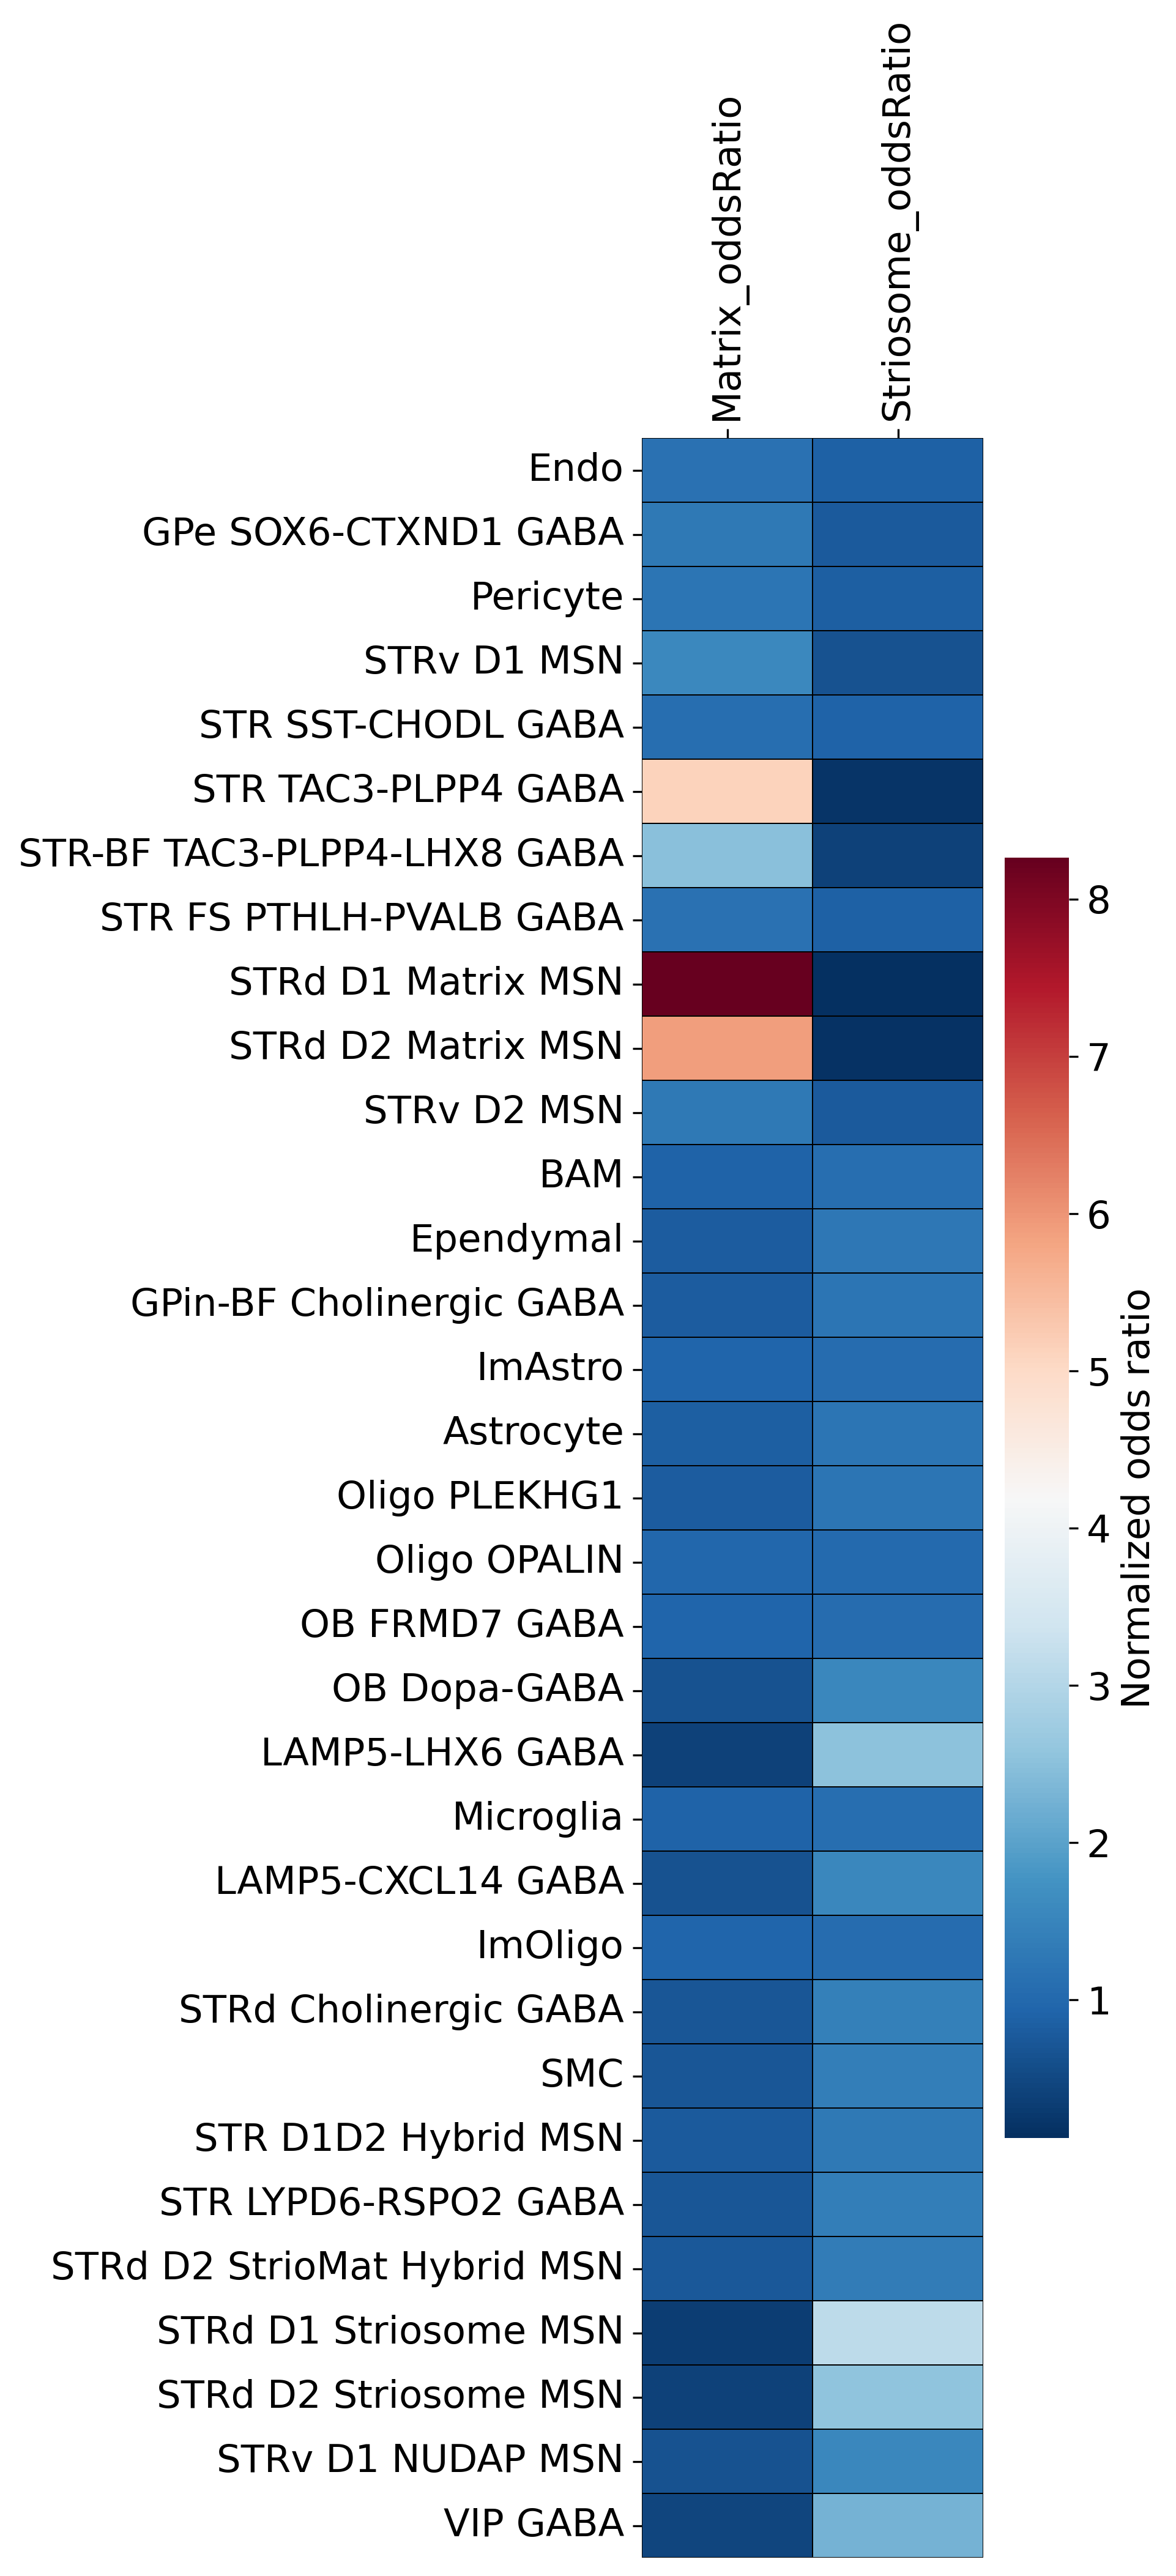

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.size'] = 15

heatmap_matrix = cellType_enrichement.iloc[:2,:].values
significant_celltypes = np.array(cellType_enrichement.iloc[:2,:].columns)
spatial_modules = np.array(cellType_enrichement.iloc[:2,:].index)

enriched_idx = np.nanargmax(heatmap_matrix,axis=0)
sort_idx = np.argsort(enriched_idx)
significant_celltypes_sorted = significant_celltypes[sort_idx] # Also sort the celltypes
heatmap_matrix = heatmap_matrix[:,sort_idx].copy()

fig,ax = plt.subplots(1,1,dpi = 300, figsize = (3,15))
sns.heatmap(heatmap_matrix.T,
            cmap = 'RdBu_r',
            linewidths=0.005, 
            linecolor='black',
            yticklabels= significant_celltypes_sorted, 
            xticklabels=spatial_modules,
            cbar_kws={'label':'Normalized odds ratio'},
            ax = ax)
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=90)
# ax.set_title(f'Enrichment for sample : {sample}')

### 3. Visualize the enrichemtn result as Lollipop plot:

- The length of the bar will show the odds ratio. (averaged across samples)
- The size of the ball will be the pval (aggregated pval across samples), the ball will have two color one for striosomes and another for matrix 
- The neuron type will be shown as a colored bar-plot and they will be sorted based on odds ratio. 
    - To sort the values, group the cell types into either enriched in matrix or strisome. Then sort them within. 
    - Also since odds ratio is always postive number we will have postive odds ratio for striosome and negative odds ratio for matrix.
- add some text to indicate what the cell type that are showing significant enrichment are. 

Note: Each barplot has two balls, one for the matrix and another for striosomes. 

In [14]:
#  get the porition of the dataframe corresponding to the odds ratio
oddsRatio_df = cellType_enrichement.iloc[:2,:].copy() # odds ratio values 
#  get the porition of the dataframe corresponding to the pvalues ratio
p_values_df = cellType_enrichement.iloc[2:,:].copy() # pvalues ratio

# Compute log10 of the pvalues and to handle the 0.00 pvalues subtract by min value 
log10_pvals_df = []
Nlog10FDR_df = []
for i in range(p_values_df.shape[0]):
    vals = p_values_df.iloc[i,:].values
    log10_pvals = np.log10(vals)
    # replace the inf with zero 
    log10_pvals[np.isinf(log10_pvals)] = 0
    # change to postive values
    log10_pvals = np.abs(log10_pvals)
    # replace the zero value with 2*max_val
    log10_pvals[log10_pvals == 0] = 2*np.max(log10_pvals)
    
    # keep record of the values before normalizing 

    Nlog10FDR_df += [pd.DataFrame(log10_pvals[np.newaxis,:], index = [p_values_df.iloc[i,:].name] , columns = p_values_df.columns)]
    # Normalize them to range [0-1], this will make it easy to control the size later. 
    log10_pvals = (log10_pvals - np.min(log10_pvals))/(np.max(log10_pvals) - np.min(log10_pvals))

    log10_pvals_df += [pd.DataFrame(log10_pvals[np.newaxis,:], index = [p_values_df.iloc[i,:].name] , columns = p_values_df.columns)]
log10_pvals_df = pd.concat(log10_pvals_df, axis = 0)
Nlog10FDR_df = pd.concat(Nlog10FDR_df, axis = 0)
log10_pvals_df

/tmp/ipykernel_11068/3103308988.py:11: RuntimeWarning: divide by zero encountered in log10
  log10_pvals = np.log10(vals)


,Astrocyte,BAM,Endo,Ependymal,GPe SOX6-CTXND1 GABA,GPin-BF Cholinergic GABA,ImAstro,ImOligo,LAMP5-CXCL14 GABA,LAMP5-LHX6 GABA,...,STRd Cholinergic GABA,STRd D1 Matrix MSN,STRd D1 Striosome MSN,STRd D2 Matrix MSN,STRd D2 StrioMat Hybrid MSN,STRd D2 Striosome MSN,STRv D1 MSN,STRv D1 NUDAP MSN,STRv D2 MSN,VIP GABA
Matrix_adjPval,0.491429,0.000709,0.185782,0.0,0.003463,0.004454,0.017952,0.045356,0.023713,0.016931,...,0.010048,1.0,1.0,1.0,0.188873,1.0,0.114048,0.184703,0.049151,0.15755
Striosome_adjPval,0.491429,0.000709,0.185782,0.0,0.003463,0.004454,0.017952,0.045356,0.023713,0.016931,...,0.010048,1.0,1.0,1.0,0.188873,1.0,0.114048,0.184703,0.049151,0.15755


In [15]:
strioMatrixClass = [] # indicator  wheather the cell type has higer odds ratio in matrix vs striosome
for celltype in oddsRatio_df.columns:
    strioMatrixClass += [np.argmax(oddsRatio_df.loc[:,celltype]).item()] # 0 = Matrix , 1 = Matrix 

# enrichement in Matrix will be positive and striosome will be negative 
oddsRatio_df.iloc[1,:] = -1*oddsRatio_df.iloc[1,:]

# group the cells in the matrix and sort them
oddsRatio_vals_sorted = []
for idx in np.unique(strioMatrixClass):
    keep = strioMatrixClass == idx
    df = oddsRatio_df.loc[:,keep]
    # order = -1 if np.all(df.iloc[idx,:].values < 0) else 1
    sortidx = np.argsort(df.iloc[idx,:])[::-1]
    oddsRatio_vals_sorted +=[df.iloc[:,sortidx]]

oddsRatio_vals_sorted = pd.concat(oddsRatio_vals_sorted, axis = 1)
oddsRatio_vals_sorted


,STRd D1 Matrix MSN,STRd D2 Matrix MSN,STR TAC3-PLPP4 GABA,STR-BF TAC3-PLPP4-LHX8 GABA,STRv D1 MSN,STRv D2 MSN,GPe SOX6-CTXND1 GABA,Pericyte,STR FS PTHLH-PVALB GABA,Endo,...,STR LYPD6-RSPO2 GABA,SMC,STRd Cholinergic GABA,STRv D1 NUDAP MSN,OB Dopa-GABA,LAMP5-CXCL14 GABA,VIP GABA,LAMP5-LHX6 GABA,STRd D2 Striosome MSN,STRd D1 Striosome MSN
Matrix_oddsRatio,8.261729,5.894760,5.142160,2.494970,1.559429,1.290557,1.287969,1.204896,1.169729,1.148006,...,0.720875,0.720522,0.714870,0.651831,0.649145,0.649010,0.439813,0.395009,0.390912,0.320540
Striosome_oddsRatio,-0.121040,-0.169642,-0.194471,-0.400806,-0.641260,-0.774859,-0.776416,-0.829947,-0.854899,-0.871075,...,-1.387203,-1.387882,-1.398855,-1.534139,-1.540488,-1.540807,-2.273693,-2.531591,-2.558120,-3.119732


In [ ]:
# load in the colormap 
grouplevel_cmap = np.load(r'./cluster_cmap_final_updated_9172025.npy',allow_pickle = True).item()

- Update the names to short version

In [ ]:
import pandas as pd
Allen_short_name = pd.read_csv(r'/Reference_snRNAseq_Allen/HMBA_BG_consensus_annotation_consensus_anno_pre_print.csv')
group = Allen_short_name['Group'].values
short_group_name = Allen_short_name['short_name_group'].values

short_name_mapper = dict(zip(group,short_group_name))

In [19]:
# short_name_mapper
oddsRatio_vals_sorted = oddsRatio_vals_sorted.rename(columns=short_name_mapper)
log10_pvals_df = log10_pvals_df.rename(columns=short_name_mapper)

In [21]:
# update the color map to use short name 
grouplevel_cmap = {short_name_mapper[nm]:grouplevel_cmap[nm] for nm in grouplevel_cmap}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


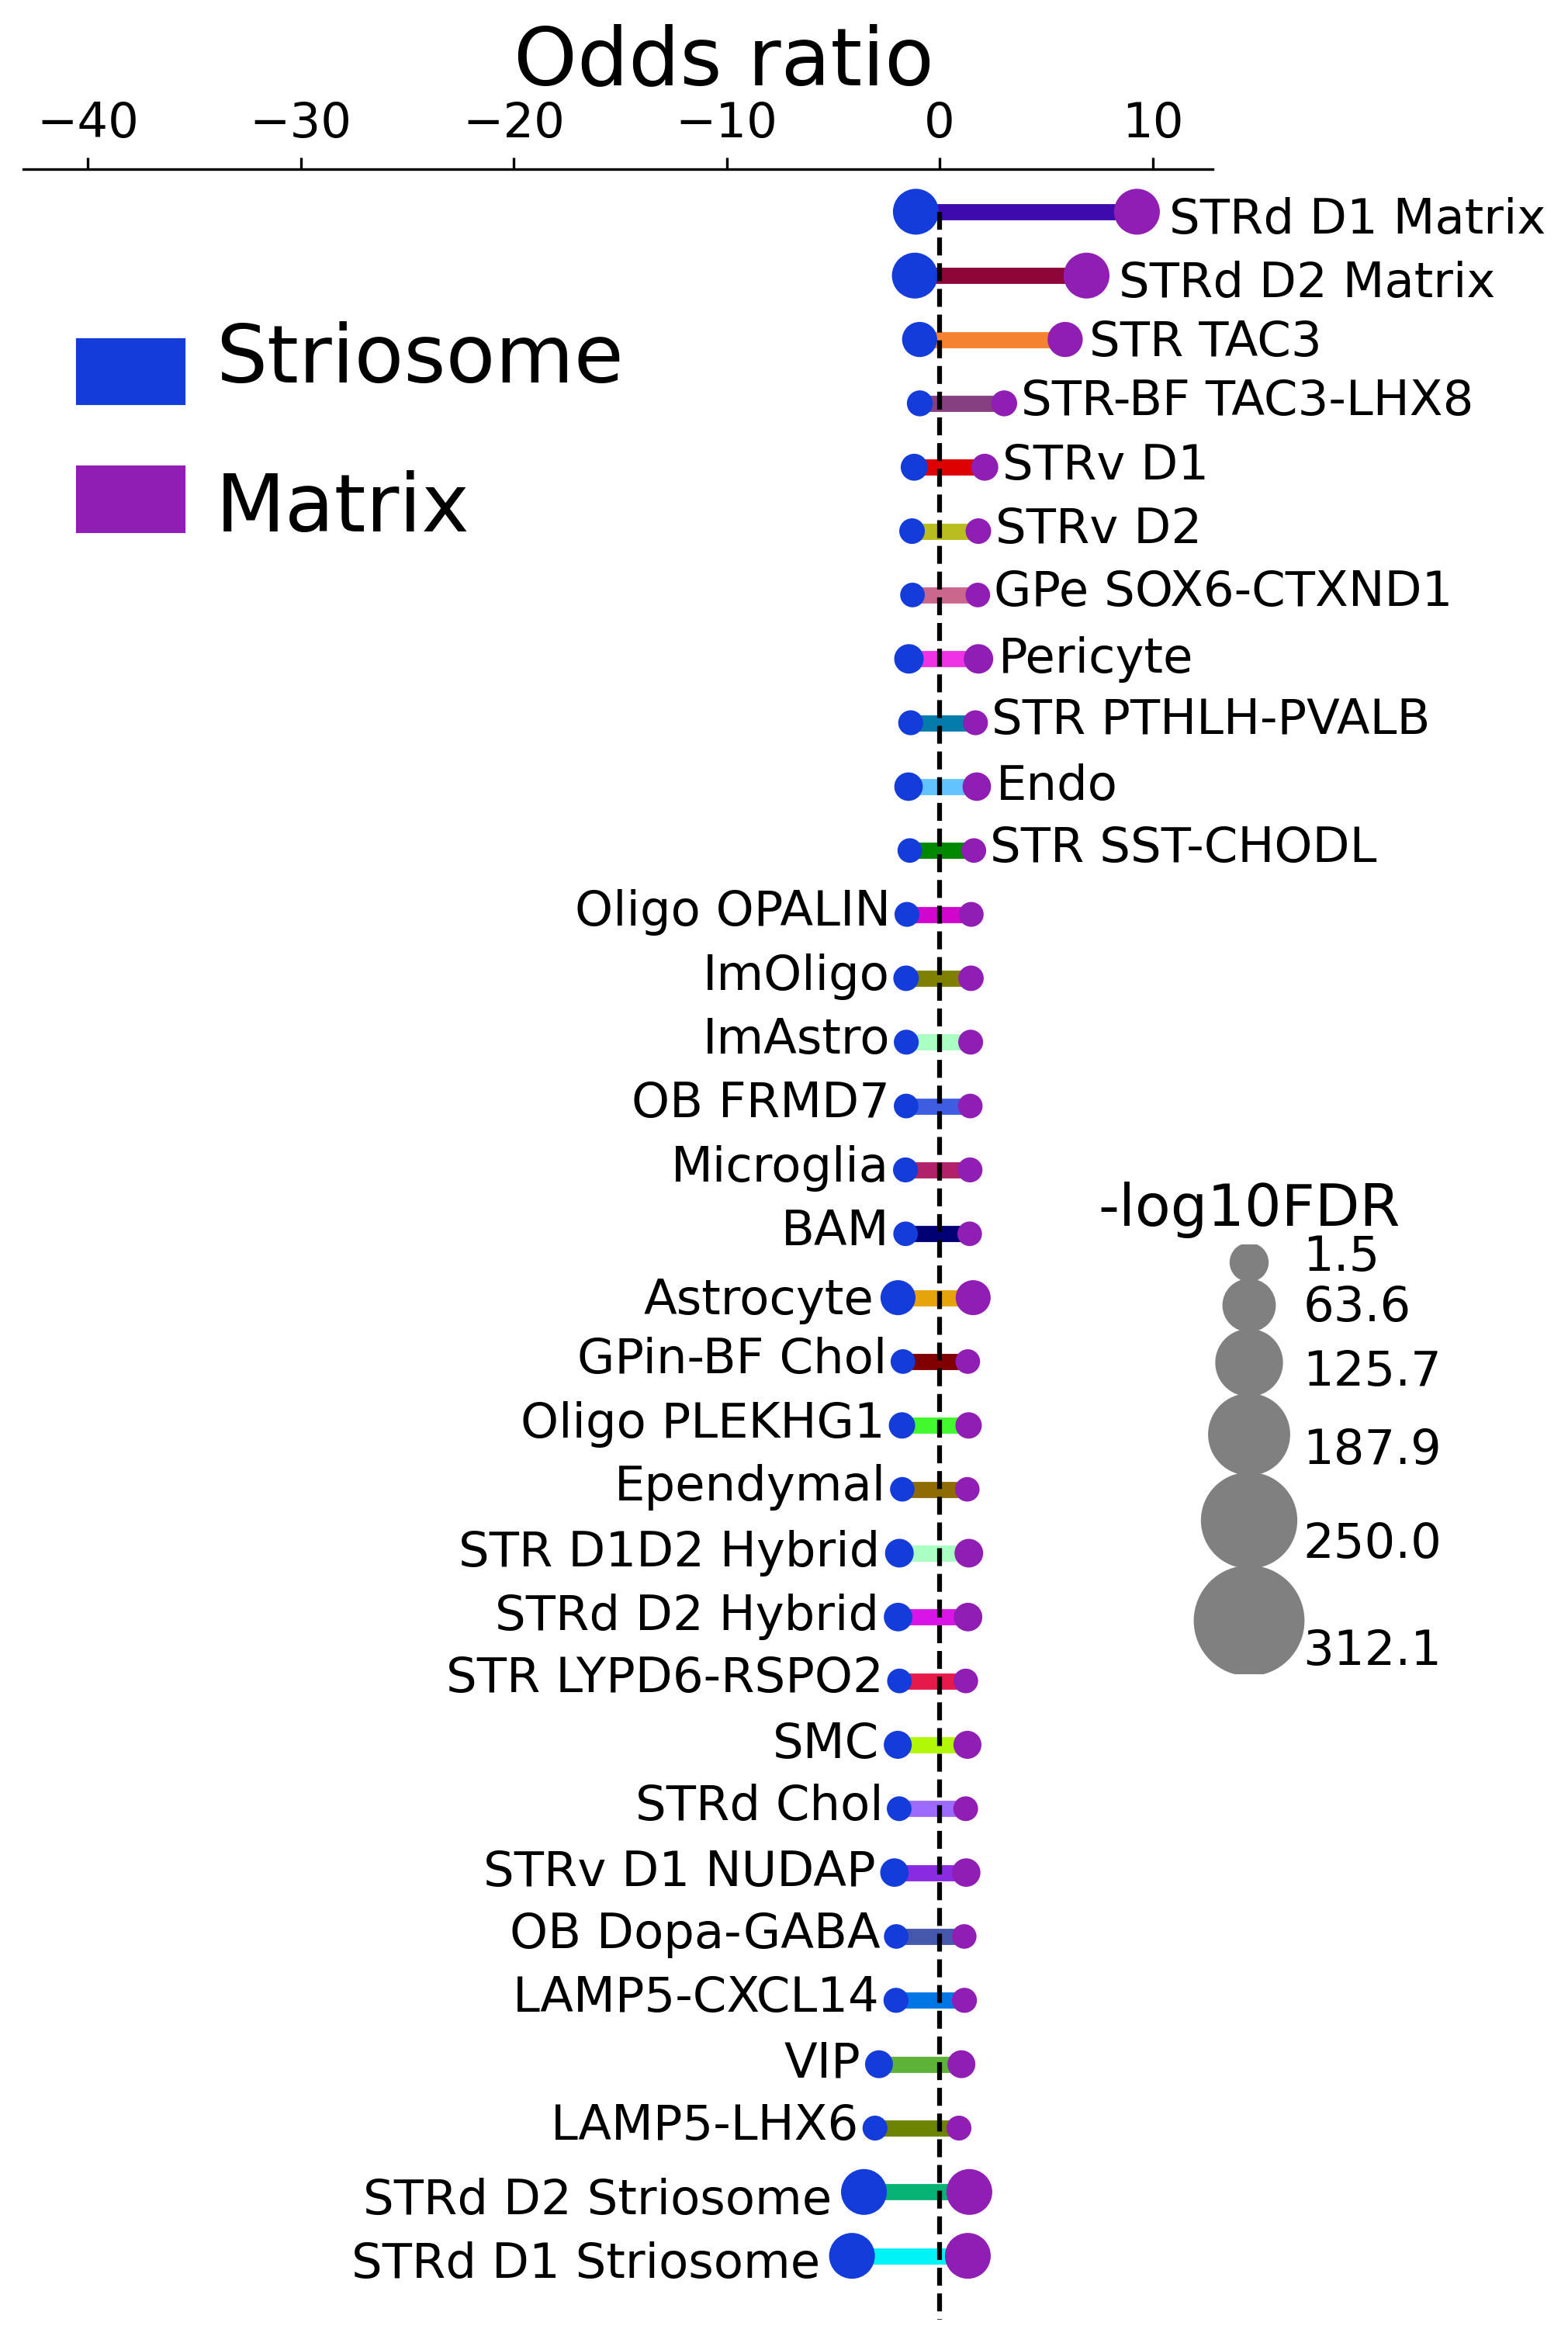

In [22]:
# plot the values 
import matplotlib.patches as patches
import matplotlib as mpl

fig,ax = plt.subplots(1,1,figsize = (7,12), dpi = 300)
mpl.rcParams['font.size'] = 15
sz_min = 0.5
sz_max = 1
scale_factor = 3 # make the y-axis sparse 



for i in np.arange(oddsRatio_vals_sorted.shape[-1]):
    val = oddsRatio_vals_sorted.iloc[:,i].values.tolist()
    celltype_nm = oddsRatio_vals_sorted.iloc[:,i].name
    ln = sns.lineplot(x = val,y= np.array([i,i])*scale_factor, color = grouplevel_cmap[celltype_nm], lw = 5, zorder = 1, ax = ax)
    # add balls at each end 
    
    matrix_pval =  log10_pvals_df.loc['Matrix_adjPval',celltype_nm] # use the log1ppval

    strio_pval = log10_pvals_df.loc['Striosome_adjPval',celltype_nm]

    # cr = sns.scatterplot(x= [val[0]],y= np.array([i])*scale_factor, s = sz_min + matrix_pval*(sz_max - sz_min) , c = 'r',zorder = 2,ax = ax)
    # sns.scatterplot(x = [val[1]],y = np.array([i])*scale_factor, s = sz_min + strio_pval*(sz_max - sz_min), c = 'g',zorder = 2,ax = ax, alpha = 0.1)
    radius = sz_min + matrix_pval*(sz_max - sz_min)
    cir1 = patches.Circle([val[0] + radius , np.array([i])*scale_factor], radius= radius , color = "#911eb4",)
    ax.add_patch(cir1)
    
    cir2 = patches.Circle([val[1] - radius , np.array([i])*scale_factor], radius= radius , color = "#143cdb", )
    ax.add_patch(cir2)
    
    # add the cell type names right at the tip of the lillipop 
    
    x_loc = val[np.argmax(np.abs(val))]
    # offset = -1*len(celltype_nm) if x_loc < 0 else 0.2*len(celltype_nm) 
    if x_loc < 0:
        # if x_loc is negative 
        x_loc -= 2.5*radius
        ax.text(x_loc,scale_factor*i + radius,celltype_nm, ha = 'right')

    else:      
        x_loc += 2.5*radius
        ax.text(x_loc,scale_factor*i + radius,celltype_nm)

ax.plot([0,0],[0,scale_factor*oddsRatio_vals_sorted.shape[-1]], c = 'k',ls = '--')


# add a legend to indicate which is striosome and which is matrix 
xmin = np.min(oddsRatio_vals_sorted)
ymax = oddsRatio_vals_sorted.shape[-1]

offset_x = -30
offset_y = 5

rec = patches.Rectangle([-10.5 + offset_x,1 + offset_y], 5, 3 , color = '#143cdb')
ax.add_patch(rec)
ax.text(-4 + offset_x,3 + offset_y,'Striosome', fontsize = 25)

xmax = np.max(oddsRatio_vals_sorted)
rec = patches.Rectangle([-10.5 + offset_x,7 + offset_y], 5, 3 , color = "#911eb4")
ax.add_patch(rec)
ax.text(-4 + offset_x,10 + offset_y,'Matrix',fontsize = 25)

# ax.set_axis_off()
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_ylim([-2,scale_factor*oddsRatio_vals_sorted.shape[-1]])


# add the pvalue legend 
bbox = ax.get_position()
# ax_legend = fig.add_axes([bbox.xmin + 0.1*bbox.width, bbox.ymin + 0.6*bbox.height, 0.2*bbox.width, 0.2*bbox.height])
ax_legend = fig.add_axes([bbox.xmin + 0.9*bbox.width, bbox.ymin + 0.3*bbox.height, 0.2*bbox.width, 0.2*bbox.height])
_,binsN = np.histogram(log10_pvals_df.values.ravel(),5)
_,binsFDR = np.histogram(Nlog10FDR_df.values.ravel(),bins=5)
y_val = 0
for i,v in enumerate(binsN[::1]):
    sz_min = 0.5
    sz_max = 1.5
    radius = sz_min + v*(sz_max - sz_min)
    y_val += radius
    cir = patches.Circle([0.5 , y_val  ], radius= radius , color = 'gray',)
    ax_legend.add_patch(cir)
    y_val += radius
    # put text of the FDR value 
    ax_legend.text(2, y_val ,np.round(binsFDR[i],decimals=1), fontsize = 15, va = 'bottom')

    # sns.scatterplot(ax = ax_legend, x = [0.5], y = 2*i*radius + radius, s = radius, c = 'gray')
ax_legend.set_ylim([0,y_val ])
ax_legend.set_aspect('equal', adjustable='datalim')
ax_legend.set_title('-log10FDR')
ax_legend.invert_yaxis()
ax_legend.set_axis_off()


ax.invert_yaxis()
ax.xaxis.tick_top()
ax.text(-20,-6,'Odds ratio', fontsize = 25)
ax.set_aspect('equal', adjustable='box')

plt.savefig(r'./figures/CMU_based_celltype_enrichment_Lollipopplot_shortname.png',bbox_inches = 'tight')
plt.savefig(r'./figures/CMU_based_celltype_enrichment_Lollipopplot_shortname.tif',bbox_inches = 'tight')
plt.savefig(r'./figures/CMU_based_celltype_enrichment_Lollipopplot_shortname.eps',bbox_inches = 'tight')

plt.show()